# MNIST data classification with Multi-layer perceptron

<img src="Neural.png" width="450" height="300">

$\hspace{13cm}$Image: 3Blue1Brown

## This is the "Hello world" example of Deep Learning. We build a multilayer perceptron using Pytorch to train the MNIST digit data. This data has been centered and normalized by the creaters and is also available on Yann LeCun's website. 

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn, optim
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import os

## Fetch the MNIST data prepared in the file provided

In [2]:
with np.load('prediction-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)

(20000, 1, 28, 28) float32
(20000,) int64
(2000, 1, 28, 28) float32


## Let's have a look at a few images with their labels

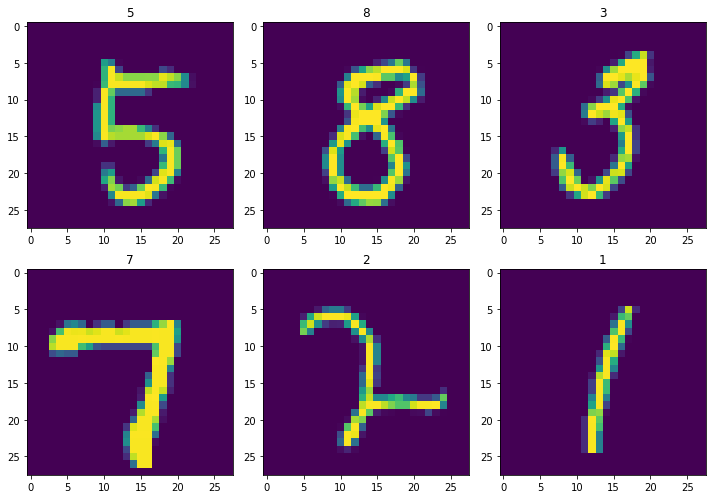

In [17]:
plt.figure(figsize=(10,7))
for i in range(5,11):
    plt.subplot(2,3,i-4)
    plt.imshow(data_x[i,0])
    plt.title(data_y[i])
    plt.tight_layout()

## This particular step is not required as our data set already comes with the necessary transformation.

In [18]:
#For data transformation. The data is rendered normalised and is converted into torch tensors.
transformer= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

## Data splitting for training and validation.

In [19]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.1,shuffle=True, random_state=42)

In [20]:
X_train.shape, y_val.shape

((18000, 1, 28, 28), (2000,))

In [21]:
#Conversion into torch tensors
X_train= torch.from_numpy(X_train)
y_train= torch.from_numpy(y_train)
X_val= torch.from_numpy(X_val)
y_val= torch.from_numpy(y_val)
Predict= torch.from_numpy(test_x)

In [22]:
#Defining the layer sizes.
input_size= 784 #28x28 
hidden= [128, 64]
output_size= 10

## Model definition: The model consists of an input layer, a single hidden layer and an output layer. The acivation functions are chosen to be ReLU and LogSoftmax for one-hot encoding.

In [23]:
model= nn.Sequential(nn.Linear(input_size, hidden[0]),
                    nn.ReLU(),
                    nn.Linear(hidden[0], hidden[1]),
                    nn.ReLU(),
                    nn.Linear(hidden[1], output_size),
                    nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [24]:
optimizer= optim.SGD(model.parameters(), lr= 0.003, momentum=0.9) #Defining the optimizer with Stochastic Gradient Descent
criterion= nn.NLLLoss() #Negative log likelihood loss

In [25]:
def get_batches(datax, datay, num_batches=64):
    '''Takes in the images and labels and divides them 
    into batches as specified.'''
    batchesX= torch.split(datax,int(len(datax)/num_batches))
    batchesY= torch.split(datay,int(len(datay)/num_batches))
    return batchesX, batchesY

## Training: The number of epochs, i.e the number of times the entire data is traversed is set to 200.

In [26]:
#Training the Model
epochs= 200
for e in range(epochs):
    running_loss=0
    losses= []
    batchesX, batchesY= get_batches(X_train, y_train)
    for i in range(len(batchesX)):
        x= torch.flatten(batchesX[i], start_dim=1)
        y= batchesY[i]
        optimizer.zero_grad()
        
        output= model(x)
        loss= criterion(output, y)
        
        #Back propagation
        loss.backward()
        
        #Learning
        optimizer.step()
        
        running_loss+= loss.item()
        losses.append(loss.item())
    print("Epoch {} --> Training loss {}".format(e, running_loss/len(batchesX[0])))
    

Epoch 0 --> Training loss 0.7880118622898631
Epoch 1 --> Training loss 0.31311829573743283
Epoch 2 --> Training loss 0.2665375479599759
Epoch 3 --> Training loss 0.18077177498688476
Epoch 4 --> Training loss 0.10697900734550164
Epoch 5 --> Training loss 0.0787147481352409
Epoch 6 --> Training loss 0.06536216743529055
Epoch 7 --> Training loss 0.05936453788411999
Epoch 8 --> Training loss 0.0538479051953745
Epoch 9 --> Training loss 0.048450089865148704
Epoch 10 --> Training loss 0.043379953747542305
Epoch 11 --> Training loss 0.03967108338196294
Epoch 12 --> Training loss 0.03692625836200773
Epoch 13 --> Training loss 0.03556652204713576
Epoch 14 --> Training loss 0.03415899172929046
Epoch 15 --> Training loss 0.03402045628990567
Epoch 16 --> Training loss 0.03234496243377597
Epoch 17 --> Training loss 0.03291888820053844
Epoch 18 --> Training loss 0.033839980001127166
Epoch 19 --> Training loss 0.031141459623689752
Epoch 20 --> Training loss 0.03060115075063663
Epoch 21 --> Training l

Epoch 170 --> Training loss 0.0015826180843643567
Epoch 171 --> Training loss 0.001196037514476341
Epoch 172 --> Training loss 0.001023422572731738
Epoch 173 --> Training loss 0.0008067818405047757
Epoch 174 --> Training loss 0.0006811937707370363
Epoch 175 --> Training loss 0.0005566492814829233
Epoch 176 --> Training loss 0.0008859285656098144
Epoch 177 --> Training loss 0.0015514328854735683
Epoch 178 --> Training loss 0.0007863478136735651
Epoch 179 --> Training loss 0.0002694313877465823
Epoch 180 --> Training loss 0.0003562627937970714
Epoch 181 --> Training loss 0.0001991148439517223
Epoch 182 --> Training loss 0.00015577912639559488
Epoch 183 --> Training loss 0.00014402558205229166
Epoch 184 --> Training loss 0.00014185693910684873
Epoch 185 --> Training loss 0.00015335999020678313
Epoch 186 --> Training loss 0.00013157094582356713
Epoch 187 --> Training loss 0.0001292516323500749
Epoch 188 --> Training loss 0.00012139230631576173
Epoch 189 --> Training loss 0.0001219883480121

## Let's run the model for a single image

In [33]:
index= np.random.randint(1,len(X_val))
image= torch.flatten(X_val[index], start_dim=1)

In [34]:
with torch.no_grad():  #Saving time, since no gradients are needed.
    logp= model(image) #Log probability
prob= torch.exp(logp)

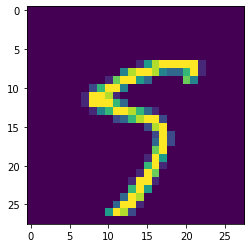

In [36]:
plt.imshow(X_val[index,0])

In [37]:
probabilities= list(prob.numpy()[0])
print("The predicted digit:", probabilities.index(max(probabilities)))
print("The true label:", int(y_val[index]))

The predicted digit: 5
The true label: 5


In [38]:
#Determining the accuracy of the model from the validation set.
correct= 0
wrong= 0
errors=[]
for i in range(len(X_val)):
    image= torch.flatten(X_val[i], start_dim=1)
    with torch.no_grad():
        logps= model(image)
    #Since the probabilites are logarithmic
    ps= torch.exp(logps)
    prob= list(ps.numpy()[0])
    prediction= prob.index(max(prob))
    if prediction==y_val[i]:
        correct+=1
    else:
        wrong+=1
        errors.append((i,prediction))

In [39]:
print("The number of correct predictions are {} out of {}".format(correct, len(X_val)))
print("The model accuracy is: ", correct/len(X_val))

The number of correct predictions are 1880 out of 2000
The model accuracy is:  0.94


## Let's have a look at some of the wrong perdictions 

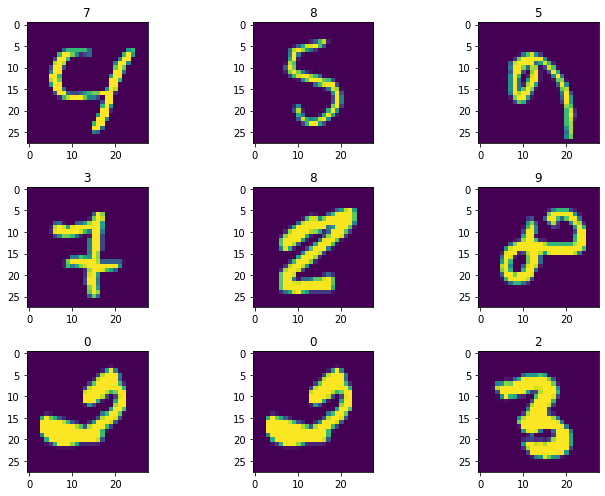

In [80]:
fig, axs= plt.subplots(nrows=3, ncols=3, figsize=(10,7))
axs= axs.ravel()
for i in range(9):
    ind= np.random.randint(0, len(errors))
    image_index= errors[ind][0]
    image_pred= errors[ind][1]
    axs[i].imshow(X_val[image_index,0])
    axs[i].set_title(image_pred)
plt.tight_layout()

## The model is run for a given test data set to which the labels aren't known.

In [40]:
#Predicting the labels for the given test data set.
labels=[]
for i in range(len(Predict)):
    image= torch.flatten(Predict[i], start_dim=1)
    with torch.no_grad():
        logps= model(image)
    #Since the probabilites are logarithmic
    ps= torch.exp(logps)
    prob= list(ps.numpy()[0])
    prediction= prob.index(max(prob))
    labels.append(prediction)

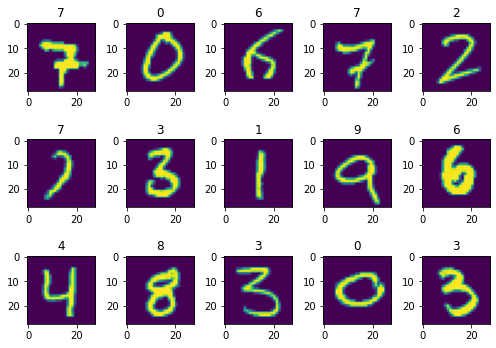

In [41]:
# A look at the predictions made on the test images.
fig, axs= plt.subplots(3,5, figsize= (7,5))
axs= axs.ravel()
for i in range(15):
    index= np.random.randint(0,len(Predict))
    axs[i].imshow(Predict[index,0])
    axs[i].set_title(labels[index])
plt.tight_layout()

In [42]:
predictions= np.asarray(labels)

In [43]:
assert predictions.ndim==1
assert predictions.shape[0]==2000

In [44]:
#An optional step to save the results.
np.save('prediction.npy', predictions)